In [27]:
import glob
from operator import ne

import matplotlib.pyplot as plt
import pandapower
import pandapower.converter
import pandapower.estimation
import pandapower.networks
import pandapower.topology
from pandapower.converter import from_mpc
from pandapower.plotting.powerflow_results import plot_voltage_profile
from pandapower.plotting.simple_plot import simple_plot
from pandapower.topology import create_nxgraph


In [28]:
fn = "../test/data/epri21.m"

In [29]:
net = from_mpc(fn)


c:\Users\TurtleCamera\AppData\Local\Programs\Python\Python310\lib\site-packages\pandapower\auxiliary.py:272: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item, dtype in list(dtypes.iteritems()):
c:\Users\TurtleCamera\AppData\Local\Programs\Python\Python310\lib\site-packages\pandapower\auxiliary.py:272: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item, dtype in list(dtypes.iteritems()):
c:\Users\TurtleCamera\AppData\Local\Programs\Python\Python310\lib\site-packages\pandapower\auxiliary.py:272: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item, dtype in list(dtypes.iteritems()):
c:\Users\TurtleCamera\AppData\Local\Programs\Python\Python310\lib\site-packages\pandapower\auxiliary.py:272: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item, dtype in li

In [30]:
net

This pandapower network includes the following parameter tables:
   - bus (19 elements)
   - load (5 elements)
   - gen (6 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (16 elements)
   - trafo (15 elements)
   - poly_cost (7 elements)

In [31]:
net.keys()

dict_keys(['bus', 'load', 'sgen', 'motor', 'asymmetric_load', 'asymmetric_sgen', 'storage', 'gen', 'switch', 'shunt', 'ext_grid', 'line', 'trafo', 'trafo3w', 'impedance', 'dcline', 'ward', 'xward', 'measurement', 'pwl_cost', 'poly_cost', 'characteristic', 'controller', 'line_geodata', 'bus_geodata', '_empty_res_bus', '_empty_res_ext_grid', '_empty_res_line', '_empty_res_trafo', '_empty_res_load', '_empty_res_asymmetric_load', '_empty_res_asymmetric_sgen', '_empty_res_motor', '_empty_res_sgen', '_empty_res_shunt', '_empty_res_switch', '_empty_res_impedance', '_empty_res_dcline', '_empty_res_ward', '_empty_res_xward', '_empty_res_trafo_3ph', '_empty_res_trafo3w', '_empty_res_bus_3ph', '_empty_res_ext_grid_3ph', '_empty_res_line_3ph', '_empty_res_asymmetric_load_3ph', '_empty_res_asymmetric_sgen_3ph', '_empty_res_storage', '_empty_res_storage_3ph', '_empty_res_gen', '_ppc', '_ppc0', '_ppc1', '_ppc2', '_is_elements', '_pd2ppc_lookups', 'version', 'converged', 'OPF_converged', 'name', 'f_hz

In [32]:
net.bus_geodata

,x,y,coords


In [33]:
net.bus.head()

,name,vn_kv,type,zone,in_service,min_vm_pu,max_vm_pu
0,0,22.0,b,1.0,True,0.7,1.3
1,1,345.0,b,1.0,True,0.7,1.3
2,2,345.0,b,1.0,True,0.7,1.3
3,3,500.0,b,1.0,True,0.7,1.3
4,4,500.0,b,1.0,True,0.7,1.3


In [34]:
net.load.head()

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,3,1500.0,600.0,0.0,0.0,NaN,1.0,True,None,False
1,None,4,1200.0,350.0,0.0,0.0,NaN,1.0,True,None,False
2,None,5,300.0,150.0,0.0,0.0,NaN,1.0,True,None,False
3,None,12,1200.0,500.0,0.0,0.0,NaN,1.0,True,None,False
4,None,13,500.0,200.0,0.0,0.0,NaN,1.0,True,None,False


In [35]:
net.sgen.head()

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable,generator_type,min_p_mw,max_p_mw,min_q_mvar,max_q_mvar


In [36]:
net.gen.head()

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,min_p_mw,max_p_mw,controllable
0,None,6,900.0,1.1,NaN,-56.56,-46.56,1.0,False,True,0.0,None,895.0,905.0,True
1,None,7,900.0,1.1,NaN,-56.56,-46.56,1.0,False,True,0.0,None,895.0,905.0,True
2,None,10,500.0,1.1,NaN,-10.61,-0.61,1.0,False,True,0.0,None,495.0,505.0,True
3,None,11,500.0,1.1,NaN,-10.61,-0.61,1.0,False,True,0.0,None,495.0,505.0,True
4,None,15,600.0,1.1,NaN,18.78,28.78,1.0,False,True,0.0,None,595.0,605.0,True


In [37]:
net.shunt.head()

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,3,None,-546.62,0.0,500.0,1,1,True
1,13,None,-212.53,0.0,345.0,1,1,True


In [38]:
net.line.head()

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent
0,None,NaN,1,2,1.0,3.511238,37.492875,1441.453717,0.0,3.547776,1.0,1,ol,True,100.0
1,None,NaN,3,4,1.0,2.350000,38.625000,0.000000,0.0,2.309401,1.0,1,ol,True,100.0
2,None,NaN,3,4,1.0,2.350000,38.625000,2100.845249,0.0,2.309401,1.0,1,ol,True,100.0
3,None,NaN,3,5,1.0,4.675000,76.875000,4176.225707,0.0,2.309401,1.0,1,ol,True,100.0
4,None,NaN,4,5,1.0,2.975000,44.500000,3137.262238,0.0,2.309401,1.0,1,ol,True,100.0


In [39]:
net.trafo.head()

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service,max_loading_percent
0,None,None,1,0,1644.5,345.0,22.0,23.024697,0.279565,0.0,...,NaN,NaN,0.0,NaN,0,False,1,1.0,True,100.0
1,None,None,3,2,2000.0,500.0,345.0,50.001024,0.320000,0.0,...,NaN,NaN,0.0,NaN,0,False,1,1.0,True,100.0
2,None,None,3,2,2000.0,500.0,345.0,50.001024,0.320000,0.0,...,NaN,NaN,0.0,NaN,0,False,1,1.0,True,100.0
3,None,None,3,2,2000.0,500.0,345.0,50.000196,0.140000,0.0,...,NaN,NaN,0.0,NaN,0,False,1,1.0,True,100.0
4,None,None,3,2,2000.0,500.0,345.0,50.000196,0.140000,0.0,...,NaN,NaN,0.0,NaN,0,False,1,1.0,True,100.0


In [40]:
net.poly_cost.head()

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,0.0,5.0,0.11,0.0,0.0,0.0
1,0,gen,0.0,5.0,0.11,0.0,0.0,0.0
2,1,gen,0.0,5.0,0.11,0.0,0.0,0.0
3,2,gen,0.0,5.0,0.11,0.0,0.0,0.0
4,3,gen,0.0,5.0,0.11,0.0,0.0,0.0


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


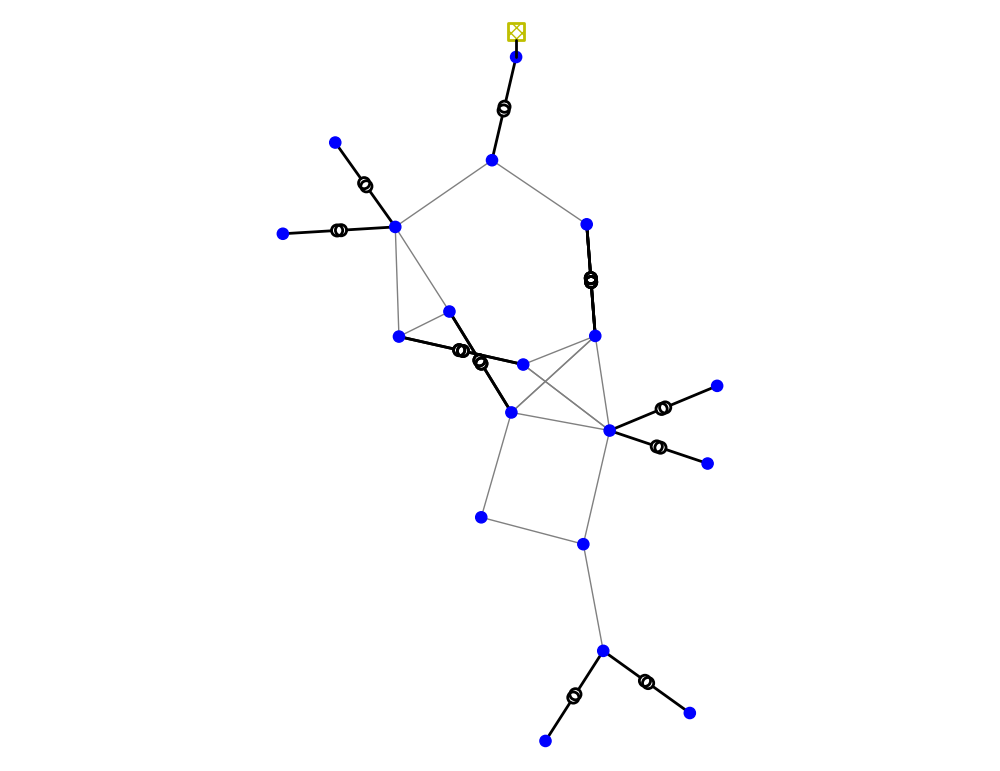

<AxesSubplot: >

In [41]:
simple_plot(net)

In [42]:
import networkx as nx
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.data import  Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.utils import from_networkx
from matplotlib import pyplot as plt

import scipy

In [71]:
# Scipy isn't able to convert a matpower 
# gmd_src_dataset = scipy.io.loadmat(fn)

# Use this for reference: https://pandapower.readthedocs.io/en/v2.0.0/topology/create_graph.html

# Create networkx graph from pandapower network
nxgraph_net = pandapower.topology.create_nxgraph(net, include_lines = True)

# Create PyTorch Geometric graph from networkx graph
pytorch_graph = from_networkx(nxgraph_net)

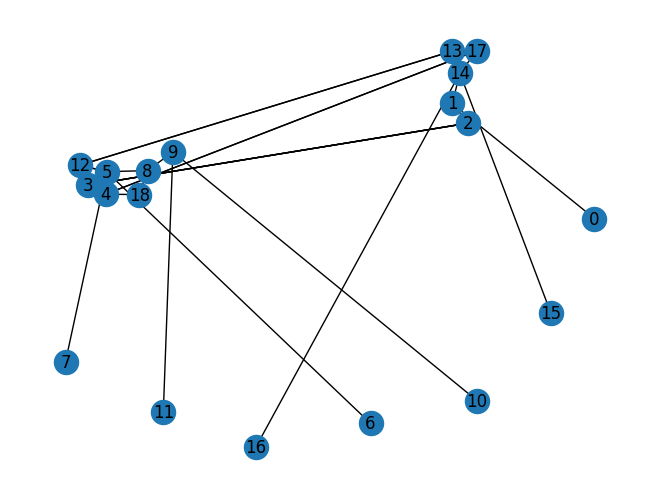

In [72]:
# Draw out the networkx graph
nx.draw(nxgraph_net, with_labels=True)

In [75]:
# Print out some information about the features and target
print(pytorch_graph)
print('Weight:', pytorch_graph.weight)
print('Path:', pytorch_graph.path)
print('Number of nodes:', pytorch_graph.num_nodes)
print('Edges:', pytorch_graph.edge_index,'\n')
print(pytorch_graph.num_node_features)

Data(edge_index=[2, 62], weight=[62], path=[62], num_nodes=19)
Weight: tensor([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
Path: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Number of nodes: 19
Edges: tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
          3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  7,
          7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
         11, 12, 13, 14, 15, 16, 17, 18],
        [ 1, 10, 12,  0,  2,  2,  2,  2,  1,  1,  1,  1,  3,  3,  4,  7,  2,  2,
          4, 11, 

In [80]:
# Print out some information about the networkx graph
print(nxgraph_net.nodes)
print(nxgraph_net.adj[1])
print(nxgraph_net[1])

[1, 2, 3, 4, 5, 8, 9, 12, 13, 17, 14, 18, 0, 6, 7, 10, 11, 15, 16]
{2: {('line', 0): {'weight': 1.0, 'path': 1}}, 14: {('line', 13): {'weight': 1.0, 'path': 1}}, 0: {('trafo', 0): {'weight': 0.0, 'path': 1}}}
{2: {('line', 0): {'weight': 1.0, 'path': 1}}, 14: {('line', 13): {'weight': 1.0, 'path': 1}}, 0: {('trafo', 0): {'weight': 0.0, 'path': 1}}}


In [81]:
# Simple GNN model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        # Read about the documentation here: https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html
        self.conv1=SAGEConv(1,8)
        self.conv2=SAGEConv(8,2)
        self.activation=torch.tanh
        
    def forward(self,graph):
        x,edge_index=graph.x,graph.edge_index
        x=self.conv1(x,edge_index)
        # print(x.shape)
        x=self.activation(x)
        x=self.conv2(x,edge_index)
        x=self.activation(x)
        x=global_mean_pool(x,torch.zeros(x.shape[0]).long())

        return x

In [82]:
# Initialize the model
f = Model()

# Use the cross entropy loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Note: I copied and pasted this from the GNN example, but we don't have features and targets defined yet

epochs = 20 # Number of epochs
lr = 0.001 # Learning rate
optimizer = torch.optim.Adam(f.parameters(), lr = lr) # Optimizer: Adam usually works well
losses = []
batch_size = 4 # Needs to be tuned
for i in range(epochs):
    loss=torch.tensor(0.)
    j=0
    output=f(pytorch_graph)
    loss=+loss_fn(output, pytorch_graph.y)
    if j==batch_size:
        optimizer.zero_grad()
        loss.backward() # compute the gradients
        optimizer.step() # update parameters
        losses.append(loss.item()) # save loss value in order to plot
        loss=torch.tensor(0.)
        j+=1